In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Scheduling algorithm

A real-time scheduling algorithm consists of rules for allocating tasks to the CPU.

We make a few simplifying assumptions:
* There is one CPU and many tasks, each with deadline requirement
* Context switch overhead is negligible

Our goal is to ensure that all tasks meet their deadlines.

Suppose that we have the following 3 tasks:

| Task | Execution time | Deadline |
| --- | --- | --- |
| 1 | 10ms | 50ms |
| 2 | 20ms | 20ms |
| 3 | 30ms | 60ms |



The worst case scenario is if all 3 tasks are ready at the same time.
Hence, if we can solve for this case, then all other cases should be satisfiable.

Note that the order of scheduling the tasks matters.

Suppose that we schedule in the order of $1, 2, 3$, with no [preemption](task_management.ipynb#Preemptive-vs-non-preemptive).
Then task 1 would complete at $t=10ms$, which fits the deadline.
But task 2 would complete at $t=10+20=30ms$, which misses the deadline of $20ms$.

If we had schedule in the order of $2, 1, 3$, then notice that all 3 tasks would have met their deadlines.

Hence, we need a good policy to decide which tasks to schedule in order for the deadlines to be met.

## Basic real-time task model

Suppose that a system has $N$ number of tasks.
Each task has:
* some known period $p_i$
* some worst-case execution time of $c_i$
    * describes the maximum amount of time needed to complete the task **without interference from other activities**
* some deadline $d_i$

It is straightforward to see that in order for the tasks to be satisfiable, $c_i \leq d_i$ and $d_i \leq p_i$, hence $c_i \leq d_i \leq p_i$.

For simplicity, we simply set the deadline of each task to be $d_i = p_i$, that is, we become as loose as possible and give the maximum possible deadline to each task.

The **worst-case response time** ($r_i$) is the maximum time between the release of the task and its completion.
(Note that this includes the time spent due to interference from other tasks).

Clearly, $c_i \leq r_i$.
To meet the deadline, we require $r_i \leq d_i$.


### Assumptions

1. Tasks are independent of each other
    * The tasks are not waiting for other tasks to complete first
2. Overhead of scheduling and context switching are negligible
3. All task's deadlines are hard deadlines

## Preemptive priority-driven schedule

The policy is simply that lower priority tasks that are currently executing gets context switched out once a higher-priority task becomes ready.

To assign the priorities, we can either use:
* Fixed priority
    * Priority does not change over time
    * _eg_ rate monotonic scheduling (RMS)
* Dynamic priority:
    * Priority may change over time
    * _eg_ earliest deadline first (EDF)

### Rate monotonic scheduling

The priority is inversely proportional to the task period, _ie_ shorter period tasks gets higher priority.
The intuition is straightforwards, processes that needs frequent attention should have higher priority.

Therefore, if a process with shorter period becomes ready, then we preempt.

#### Hyper period

A **hyper period** is the least common multiple of all task periods.

Notice that the schedule will repeat every hyper period.
Hence, if we simulate the behaviour of the the schedule over 1 hyper period, then the task set is schedulable.

#### Feasibility and optimality

A **feasible schedule** is a schedule that can meet all timing constraints.

And a scheduling algorithm is deemed **optimal** if it produces a feasible schedule if one exists.

Note that finding all feasible schedules is difficult, because if there are $N$ task, then there are $N!$ different permutation of priority assignments.

It is proven that *if any task set  is schedulable by any fixed priority assignment, then it is schedulable by RMS also*.

Hence, to test if any task set is shedulable under fixed priority, we just need to check schedulablity under  RMS.

## Schedulabiity analysis

**Schedulablity analysis** is the method of:
* analyzing the system and predicting the worst case behaviour with respec to timings
* valdiating that the worst case behaviour meets timing constraints at design time

The problem arises, given a task set, how do we know if the task set is schedulable?

### Utilization

The **utilization** of a periodic task set is the fraction of CPU time spend on execution:
$$
U = \sum _i \frac{c_i}{p_i}
$$

Suppose that this is our task set

| Task | Execution time | Period |
| --- | --- | --- |
| 1 | 10ms | 50ms |
| 2 | 20ms | 60ms |
| 3 | 30ms | 60ms |



$$
U = \frac{10}{50} + \frac{20}{60} + \frac{30}{60} = \frac{31}{30}
$$

#### Necessary condition

It is trivial to see that $U \leq 1$ is a **necessary** condition for any task to be schedulable, otherwise we won't have enough CPU time in a hyper period to complete all tasks.

However, $U \leq 1 $ is not a sufficient condition for the existence of a schedulability **under fixed priority**.

Consider the below task set:

| Task | Execution time | Period |
| --- | --- | --- |
| 1 | 20ms | 50ms |
| 2 | 40ms | 70ms |



Here, $$U = \frac{20}{50} + \frac{40}{70} = \frac{34}{35} \leq 1$$

Now, suppose that task 1 has higher priority.

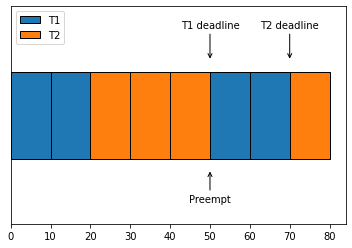

In [4]:
plt.barh(y=1, width=10, left=[0, 10, 50, 60], label="T1", edgecolor="black")
plt.barh(y=1, width=10, left=[20, 30, 40, 70], label="T2", edgecolor="black")
plt.annotate(
    "T1 deadline",
    xy=(50, 1.5),
    xytext=(50, 1.8),
    ha="center",
    arrowprops={"arrowstyle": "->"},
)
plt.annotate(
    "T2 deadline",
    xy=(70, 1.5),
    xytext=(70, 1.8),
    ha="center",
    arrowprops={"arrowstyle": "->"},
)
plt.annotate(
    "Preempt",
    xy=(50, 0.5),
    xytext=(50, 0.2),
    ha="center",
    arrowprops={"arrowstyle": "->"},
)
plt.ylim(0, 2)
plt.yticks([])
plt.legend(loc="upper left")
plt.show()

Hence. task 2 failed to meet its deadline, as it only performed 30ms out of its required 40ms.

Suppose that task 2 has higher priority instead.

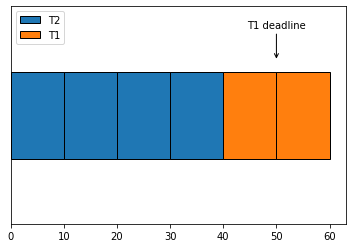

In [53]:
plt.barh(y=1, width=10, left=[0, 10, 20, 30], label="T2", edgecolor="black")
plt.barh(y=1, width=10, left=[40, 50], label="T1", edgecolor="black")
plt.annotate(
    "T1 deadline",
    xy=(50, 1.5),
    xytext=(50, 1.8),
    ha="center",
    arrowprops={"arrowstyle": "->"},
)
plt.ylim(0, 2)
plt.yticks([])
plt.legend(loc="upper left")
plt.show()

Now, task 1 failed to meet its deadline.

Thus, the task set is not schedulable using fixed priority, despite $U \leq 1$.

#### Sufficient condition

Given a task set with $n$ tasks, if 
$$
U \leq n \left(2^{\frac{1}{n}} - 1\right)
$$,
then it is schedulable under fixed priority.

Note that this is a sufficient (but **not necessary**) condition.

Given the following task set:

| Task | Execution time | Period |
| --- | --- | --- |
| 1 | 10ms | 20ms |
| 2 | 10ms | 30ms |

$$
U = \frac{10}{20} + \frac{10}{30} = \frac{5}{6} \approx 0.833 >  2 \left( 2 ^\frac{1}{2} - 1 \right) \approx 0.828
$$

Hence, the task set does not satisfy the condition.

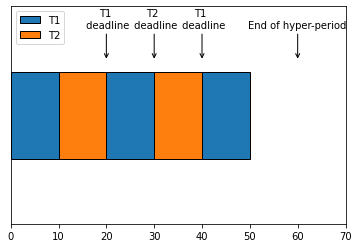

In [6]:
plt.barh(y=1, width=10, left=[0, 20, 40], label="T1", edgecolor="black")
plt.barh(y=1, width=10, left=[10, 30], label="T2", edgecolor="black")
plt.annotate(
    "T1 \n deadline",
    xy=(20, 1.5),
    xytext=(20, 1.8),
    ha="center",
    arrowprops={"arrowstyle": "->"},
)
plt.annotate(
    "T1 \n deadline",
    xy=(40, 1.5),
    xytext=(40, 1.8),
    ha="center",
    arrowprops={"arrowstyle": "->"},
)
plt.annotate(
    "T2 \n deadline",
    xy=(30, 1.5),
    xytext=(30, 1.8),
    ha="center",
    arrowprops={"arrowstyle": "->"},
)
plt.annotate(
    "End of hyper-period",
    xy=(60, 1.5),
    xytext=(60, 1.8),
    ha="center",
    arrowprops={"arrowstyle": "->"},
)
plt.ylim(0, 2)
plt.xlim(0, 70)
plt.yticks([])
plt.legend(loc="upper left")
plt.show()

However, the task set is still schedulable, as per above.

### Critical instant

A **critical instant** is the time when the release of the task will produce the largest response time, while the **critical instance** is the task which is released.

$Theorem:$ A critical instant for any tasks occurs when it is released at the same time as the release of all higher priority tasks.

Hence, the worst-case response time of task $i$ is simply the sum of the time spent on processing higher priority tasks (**interference**) and $c_i$.
And for the task set to be schedulable, $r_i$ at its critical instant must be at most its deadline $d_i$.

We now consider the naive approach of considering the number of higher priority tasks released in a period of the critical instance.

Suppose we have the following task set:

| Task | Execution time | Period |
| --- | --- | --- |
| 1 | 40ms | 100ms |
| 2 | 40ms | 150ms |
| 3 | 100ms | 350ms |

We now take task 3 as our critical instance.

Task 1 will be released 4 times and task 2 will be released 3 times before $t=350$.
Hence, the total interference $4(40) + 3(40) = 280ms$.
Thus, the worst-case response time at the critical instant is $r_i = 280 + 100 = 380 > 350$.
However, when we look at the schedule:

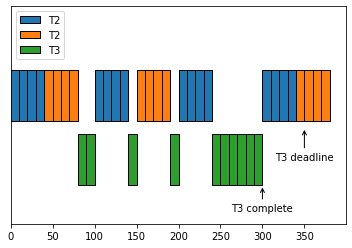

In [7]:
plt.barh(
    y=1,
    width=10,
    left=[j * 10 + i * 100 for j in range(4) for i in range(4)],
    label="T2",
    edgecolor="black",
)
plt.barh(
    y=1,
    width=10,
    left=[j * 10 + i for j in range(4) for i in [40, 150, 340]],
    label="T2",
    edgecolor="black",
)
plt.barh(
    y=0,
    width=10,
    left=[80, 90, 140, 190, 240, 250, 260, 270, 280, 290],
    label="T3",
    edgecolor="black",
)
plt.annotate(
    "T3 deadline",
    xy=(350, 0.5),
    xytext=(350, 0),
    ha="center",
    arrowprops={"arrowstyle": "->"},
)
plt.annotate(
    "T3 complete",
    xy=(300, -0.4),
    xytext=(300, -0.8),
    ha="center",
    arrowprops={"arrowstyle": "->"},
)
plt.yticks([])
plt.ylim(-1, 2.4)
plt.legend(loc="upper left")
plt.show()

Task 3 is able to complete before its deadline.
Our analysis was wrong because task 1 and 2 were released another time between the time of task 3 completion and its next release, which made us over-count the amount of interference.

To refine our analysis, we should check if the capacity can accommodate the demand any instant right before a new task is released.
If it does, then our task is can meet its deadline.

Moving back to our example, the points would be $t = 100, 150, 200, 300, 350$.

| t| capacity| demand | is enough | 
| --- | --- | --- | --- | 
| 100 | 100 | 40 + 40 + 100 = 180 | no |
| 150 | 150 | 180 + 40 = 220 | no | 
| 200 | 200 | 220 + 40 = 260 | no |
| 300 | 300 | 260 + 40 = 300 | yes |

Hence, it agrees with our scheduling chart, where task 3 meets its deadline at $t=300$.

Formally, this is defined as:
$$
w_i(t) = \sum _{k=1} ^i c_k \times \left \lceil\frac{t}{p_k}\right \rceil 
$$

And we require that
$$
w_i(t) \leq t \quad \exists  t = k p_j, 1 \leq j \leq i, 1 \leq k \leq \left\lfloor \frac{p_i}{p_j} \right\rfloor
$$

If and only if the above is true, then task $i$ is **RM-schedulable**.

## Earliest deadline first (EDF)

This is a **dynamic priority** scheduling scheme.
At any instant, the task with the earliest deadline has the highest priority

Note that we only need to reassign the priority of the tasks at the instants where a new task is released.

### Properties

EDF is **optimal**, hence it will always produces a feasible schedule, if one exists.

Hence, it will produces a feasible schedule if and only if $U \leq 1$.

### RMS vs EDF

| RMS | EDF |
| :--- | :--- |
| Simpler implementation | More complex implementation |
| Worse utilization | Full utilization of CPU |
| Not as good at aperiodic events | Good for aperiodic events |

## Cyclic executive

For RMS and EDF, we were concerned with tasks that can be released at any time after its period elapsed.
What if our task set is released on a fixed schedule and is known beforehand?

Then, we can utilize the **cyclic executive** for a much simpler implementation.

We can produce an **offline** static schedule for a hyper-period which can meet all the deadlines.
This means we don't incur the overhead of scheduling and context switching.

### Major cycle

This is synonymous with a hyper-period

### Minor cycle

A major cycle will be split into minor cycles.

The length of a minor cycle is equal the the [GCD](../discrete_structures/integers.ipynb#Greatest-common-divisor) of the task periods.

The cyclic executive repeats the schedule every major cycle.

Within the major cycles, the minor cycles are the synchronization points.

Suppose that we are given the following task set:

| Task | Execution time | Period |
| --- | --- | --- |
| 1 | 9ms | 20ms |
| 2 | 8ms | 40ms |
| 3 | 8ms | 40ms |
| 4 | 2ms | 80ms |

Then, the major cycle is length $80ms$, while the minor cycle is length $20ms$.

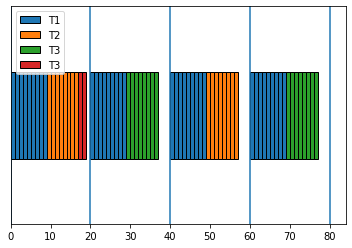

In [8]:
plt.barh(
    y=1,
    width=1,
    left=[j + i for j in range(9) for i in range(0, 80, 20)],
    label="T1",
    edgecolor="black",
)
plt.barh(
    y=1,
    width=1,
    left=[j + i for j in range(8) for i in range(9, 80, 40)],
    label="T2",
    edgecolor="black",
)
plt.barh(
    y=1,
    width=1,
    left=[j + i for j in range(8) for i in range(29, 80, 40)],
    label="T3",
    edgecolor="black",
)
plt.barh(y=1, width=1, left=[17, 18], label="T3", edgecolor="black")
plt.vlines([i for i in range(0, 81, 20)], ymin=0, ymax=2)
plt.yticks([])
plt.ylim(0, 2)
plt.legend(loc="upper left")
plt.show()

Notice that there are gaps in the schedule, which are the periods where the CPU has completed all its tasks and is waiting for new tasks to be released.
These are the points of synchronization.

The pseudo-code would be as below:

``` python
while True:
    wait_for_interrupt()
    task1()
    task2()
    task4()
    
    wait_for_interrupt()
    task1()
    task3()
    
    wait_for_interrupt()
    task1()
    task2()
    
    wait_for_interrupt()
    task1()
    task3()
```

### Advantages

This have some clear advantages over the previous approaches, namely:
* No preemption overhead
* All procedure can share address space because there is no concurrent access
* Implementation is straightforward